In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
!pip uninstall xgboost
!pip install xgboost

Found existing installation: xgboost 0.90
Uninstalling xgboost-0.90:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/xgboost-0.90.dist-info/*
    /usr/local/lib/python3.7/dist-packages/xgboost/*
    /usr/local/xgboost/libxgboost.so
Proceed (y/n)? y
y
  Successfully uninstalled xgboost-0.90
     |████████████████████████████████| 173.5 MB 57 kB/s 


In [4]:
df = pd.read_csv("/content/drive/Shareddrives/TNT/정규세션/2021년 2학기/산업인공지능/TASK4 데이터/hourly_electricity.csv")

# EDA

In [5]:
df.info

<bound method DataFrame.info of          Unnamed: 0   power_usage  ...  categorical_day_of_week  categorical_hour
0             17544      2.538071  ...                        2                 0
1             17545      2.855330  ...                        2                 1
2             17546      2.855330  ...                        2                 2
3             17547      2.855330  ...                        2                 3
4             17548      2.538071  ...                        2                 4
...             ...           ...  ...                      ...               ...
2198067    10461482  20824.324324  ...                        6                19
2198068    10461483  19527.027027  ...                        6                20
2198069    10461484  20202.702703  ...                        6                21
2198070    10461485  19851.351351  ...                        6                22
2198071    10461486  20135.135135  ...                        6   

In [6]:
df.sample(5)

Unnamed: 0  power_usage  ...  categorical_day_of_week  categorical_hour
816046      3272081   148.607976  ...                        1                14
411970      1726506   151.898734  ...                        6                10
1524110     6997319    80.763013  ...                        0                 6
810081      3245811    34.372331  ...                        3                 1
687172      2771089    20.210057  ...                        1                 4

[5 rows x 14 columns]

In [7]:
df.tail()

Unnamed: 0   power_usage  ...  categorical_day_of_week  categorical_hour
2198067    10461482  20824.324324  ...                        6                19
2198068    10461483  19527.027027  ...                        6                20
2198069    10461484  20202.702703  ...                        6                21
2198070    10461485  19851.351351  ...                        6                22
2198071    10461486  20135.135135  ...                        6                23

[5 rows x 14 columns]

In [8]:
df.head()

Unnamed: 0  power_usage  ...  categorical_day_of_week  categorical_hour
0       17544     2.538071  ...                        2                 0
1       17545     2.855330  ...                        2                 1
2       17546     2.855330  ...                        2                 2
3       17547     2.855330  ...                        2                 3
4       17548     2.538071  ...                        2                 4

[5 rows x 14 columns]

#####Unnamed :0, &nbsp; power_usage ,&nbsp;t, &nbsp; days_from_start(1096부터 하루지날때마다 하나씩 더함), &nbsp; categorical_id(=id), &nbsp; date, &nbsp;id, &nbsp; hour, &nbsp; day &nbsp; 
#####day of the week(월요일이 0), &nbsp; month &nbsp; hours from start(id 하나가 진행한 시간=t), &nbsp;  categorical day of week(=day of the week) &nbsp; categorical_hour(=hour)
##### 같은 거 없애고 분석


In [9]:
droplist = ['categorical_id', 'hours_from_start', 'categorical_day_of_week', 'categorical_hour', 'Unnamed: 0', 'date']
df.drop(columns = droplist)

power_usage        t  days_from_start  ... day  day_of_week  month
0            2.538071  26304.0             1096  ...   1            2      1
1            2.855330  26305.0             1096  ...   1            2      1
2            2.855330  26306.0             1096  ...   1            2      1
3            2.855330  26307.0             1096  ...   1            2      1
4            2.538071  26308.0             1096  ...   1            2      1
...               ...      ...              ...  ...  ..          ...    ...
2198067  20824.324324  32299.0             1345  ...   7            6      9
2198068  19527.027027  32300.0             1345  ...   7            6      9
2198069  20202.702703  32301.0             1345  ...   7            6      9
2198070  19851.351351  32302.0             1345  ...   7            6      9
2198071  20135.135135  32303.0             1345  ...   7            6      9

[2198072 rows x 8 columns]

In [10]:
df['power_usage'].unique()

array([2.53807107e+00, 2.85532995e+00, 2.85532995e+00, ...,
       2.14459459e+04, 2.26621622e+04, 2.37297297e+04])

In [11]:
df['t'].unique()

array([26304., 26305., 26306., ..., 32301., 32302., 32303.])

In [12]:
df['id'].unique()

array(['MT_001', 'MT_002', 'MT_003', 'MT_004', 'MT_005', 'MT_006',
       'MT_007', 'MT_008', 'MT_009', 'MT_010', 'MT_011', 'MT_012',
       'MT_013', 'MT_014', 'MT_015', 'MT_016', 'MT_017', 'MT_018',
       'MT_019', 'MT_020', 'MT_021', 'MT_022', 'MT_023', 'MT_024',
       'MT_025', 'MT_026', 'MT_027', 'MT_028', 'MT_029', 'MT_030',
       'MT_031', 'MT_032', 'MT_033', 'MT_034', 'MT_035', 'MT_036',
       'MT_037', 'MT_038', 'MT_039', 'MT_040', 'MT_041', 'MT_042',
       'MT_043', 'MT_044', 'MT_045', 'MT_046', 'MT_047', 'MT_048',
       'MT_049', 'MT_050', 'MT_051', 'MT_052', 'MT_053', 'MT_054',
       'MT_055', 'MT_056', 'MT_057', 'MT_058', 'MT_059', 'MT_060',
       'MT_061', 'MT_062', 'MT_063', 'MT_064', 'MT_065', 'MT_066',
       'MT_067', 'MT_068', 'MT_069', 'MT_070', 'MT_071', 'MT_072',
       'MT_073', 'MT_074', 'MT_075', 'MT_076', 'MT_077', 'MT_078',
       'MT_079', 'MT_080', 'MT_081', 'MT_082', 'MT_083', 'MT_084',
       'MT_085', 'MT_086', 'MT_087', 'MT_088', 'MT_089', 'MT_0

In [13]:
df['id'].value_counts()

MT_085    6000
MT_353    6000
MT_004    6000
MT_092    6000
MT_252    6000
          ... 
MT_116    4848
MT_109    4848
MT_181    4488
MT_133    4280
MT_178    1248
Name: id, Length: 369, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


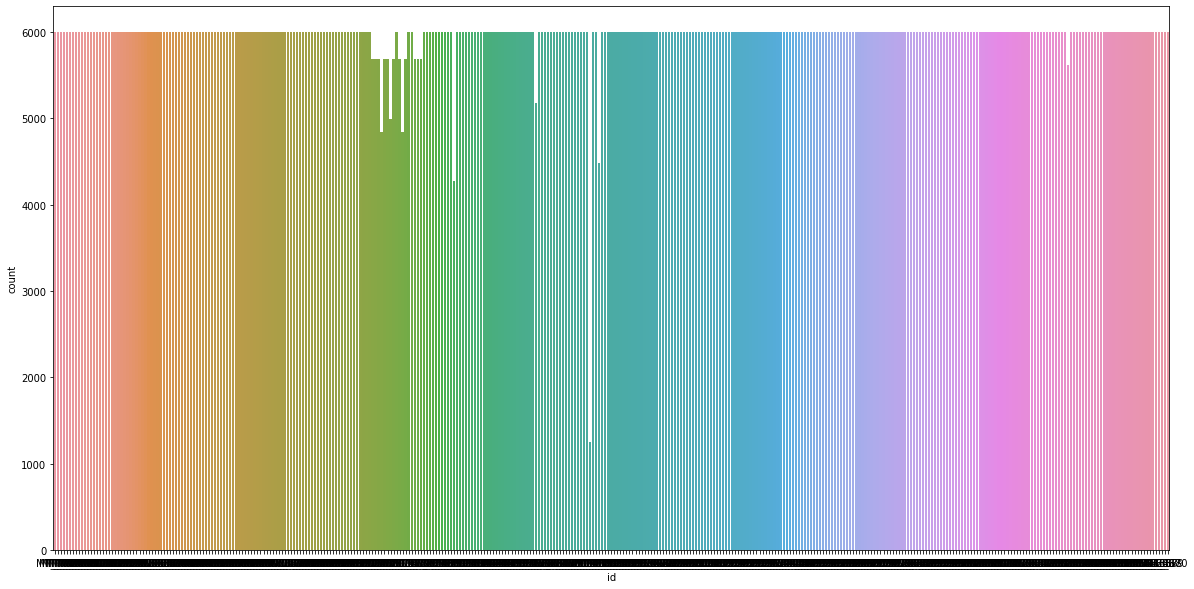

In [14]:
# 1 id당 대략 250일 정도 사용
plt.figure(figsize= (20,10))
sns.countplot(df['id'])

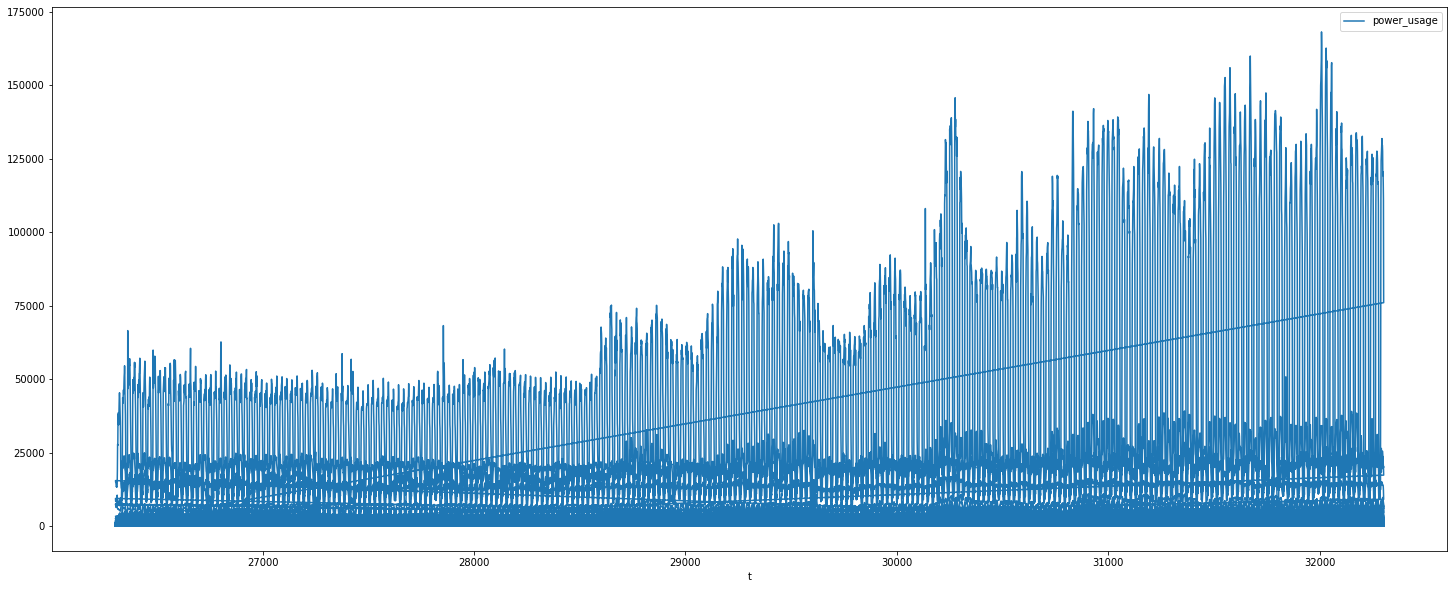

In [15]:
df.plot(x = 't', y= 'power_usage', figsize=(25,10), kind= 'line')

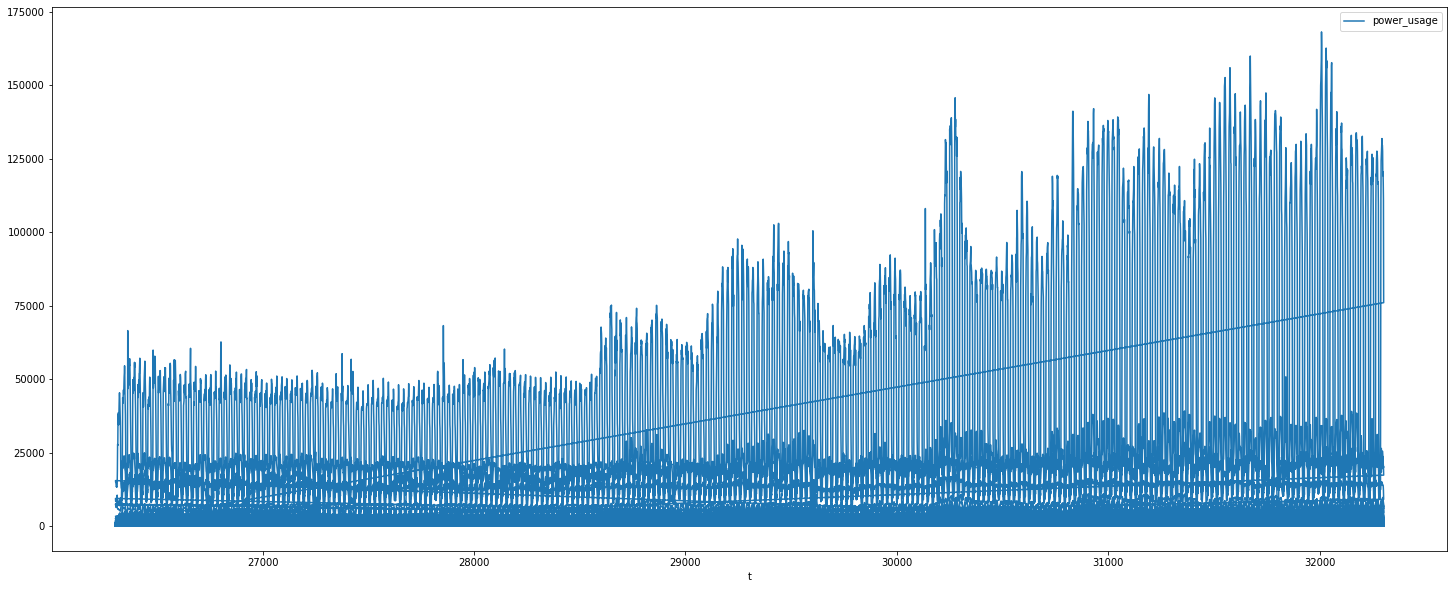

In [16]:
df.plot(x = 't', y= 'power_usage', figsize=(25,10))

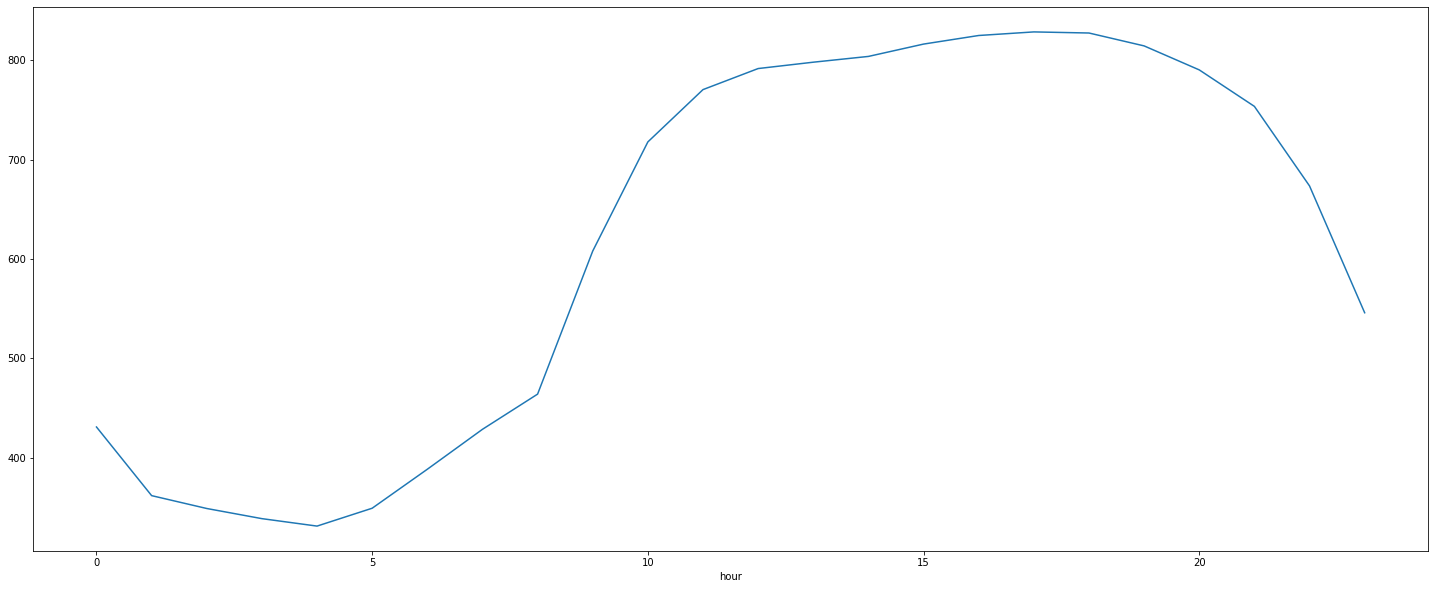

In [17]:
df.groupby(['hour'])['power_usage'].mean().plot(figsize=(25,10))

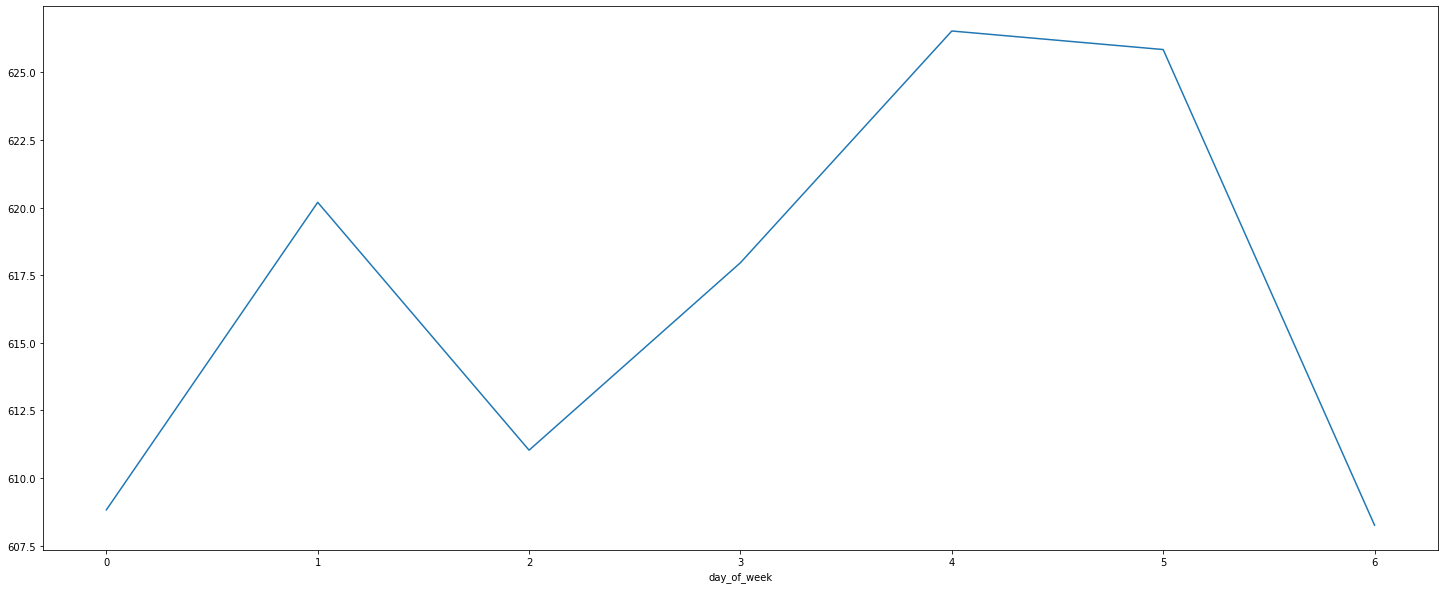

In [18]:
df.groupby(['day_of_week'])['power_usage'].mean().plot(figsize=(25,10))

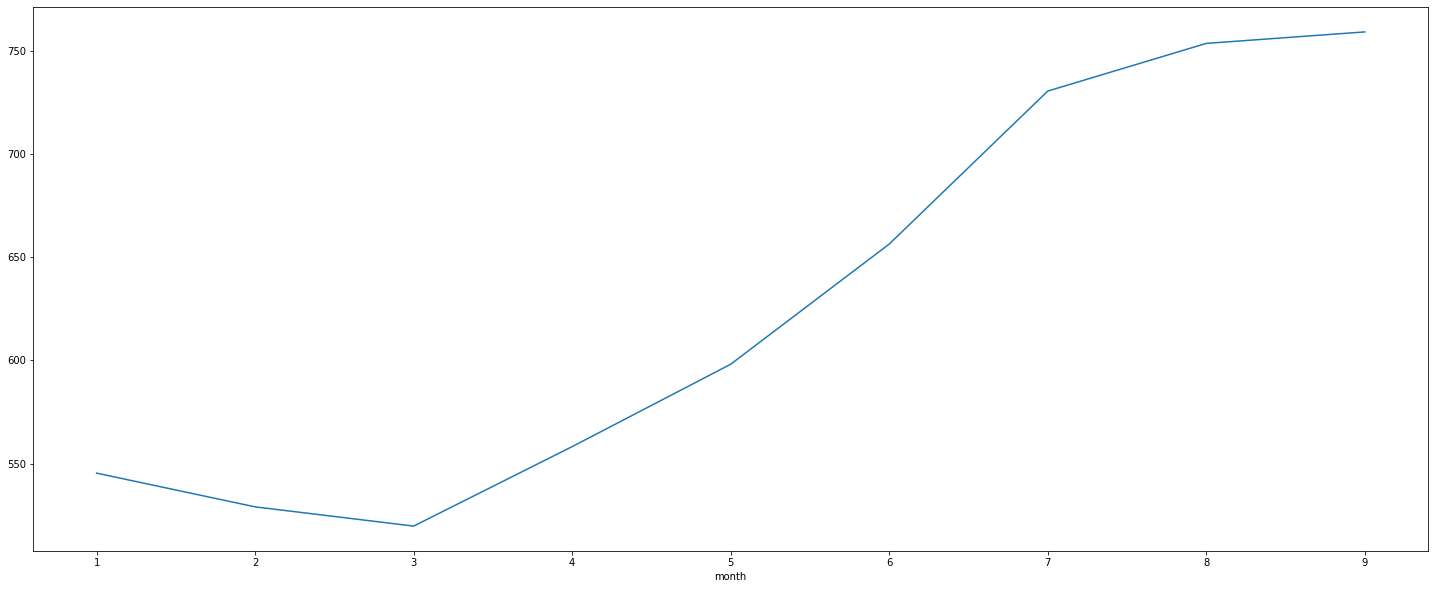

In [19]:
df.groupby(['month'])['power_usage'].mean().plot(figsize=(25,10))

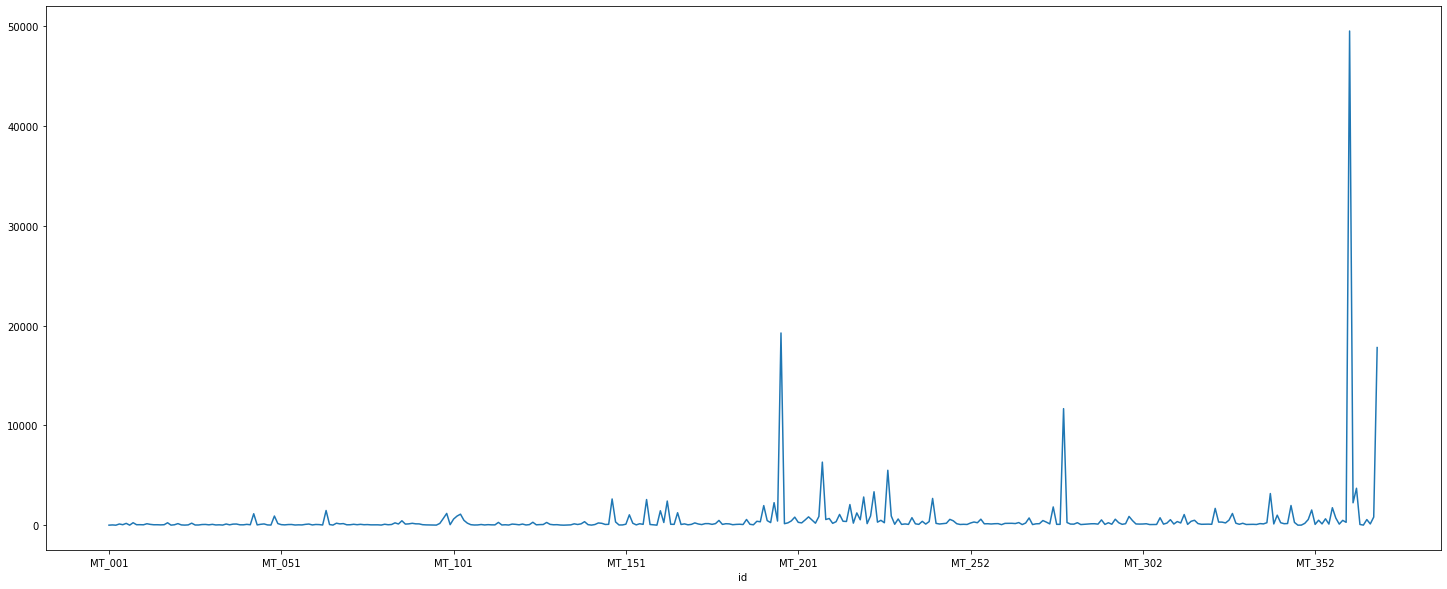

In [20]:
df.groupby(['id'])['power_usage'].mean().plot(figsize=(25,10))

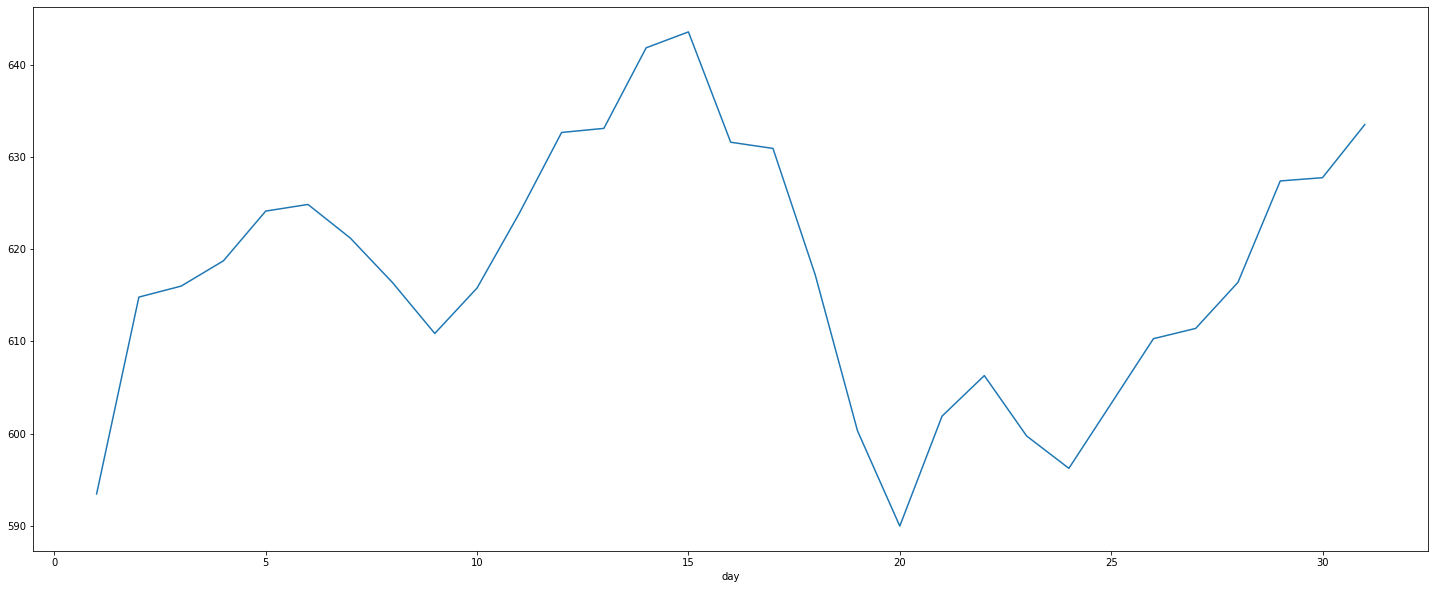

In [21]:
df.groupby(['day'])['power_usage'].mean().plot(figsize=(25,10)) 

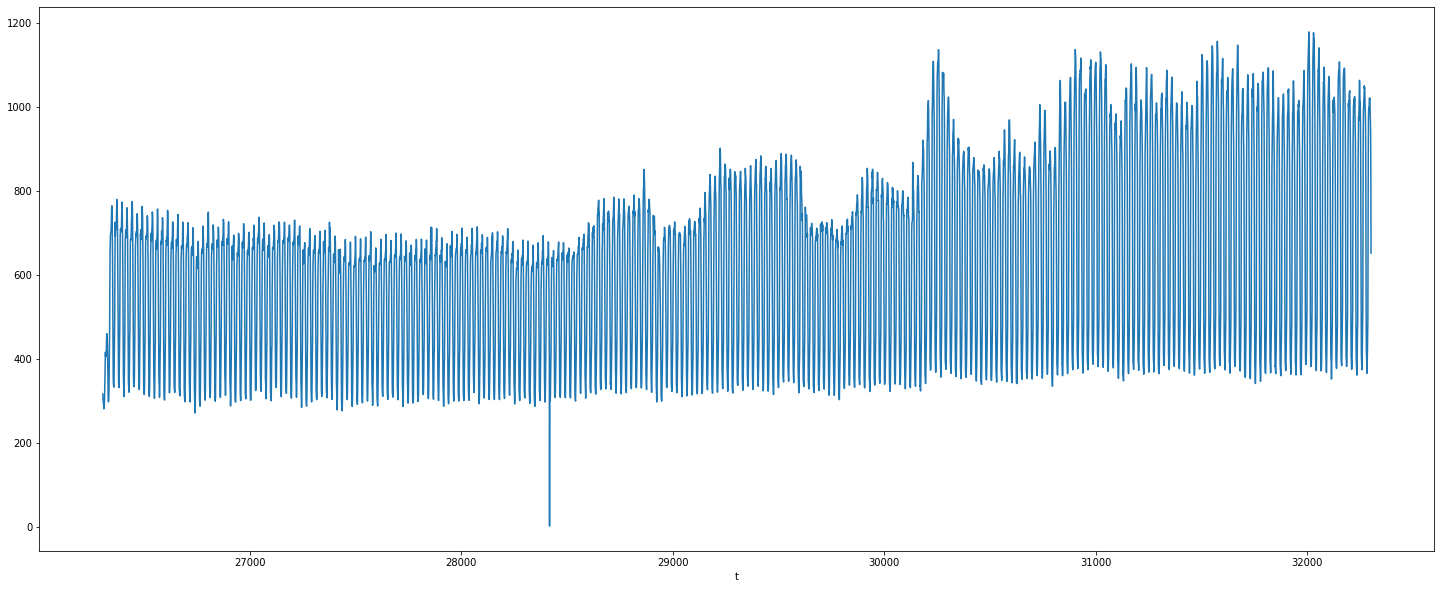

In [22]:
df.groupby(['t'])['power_usage'].mean().plot(figsize=(25,10))

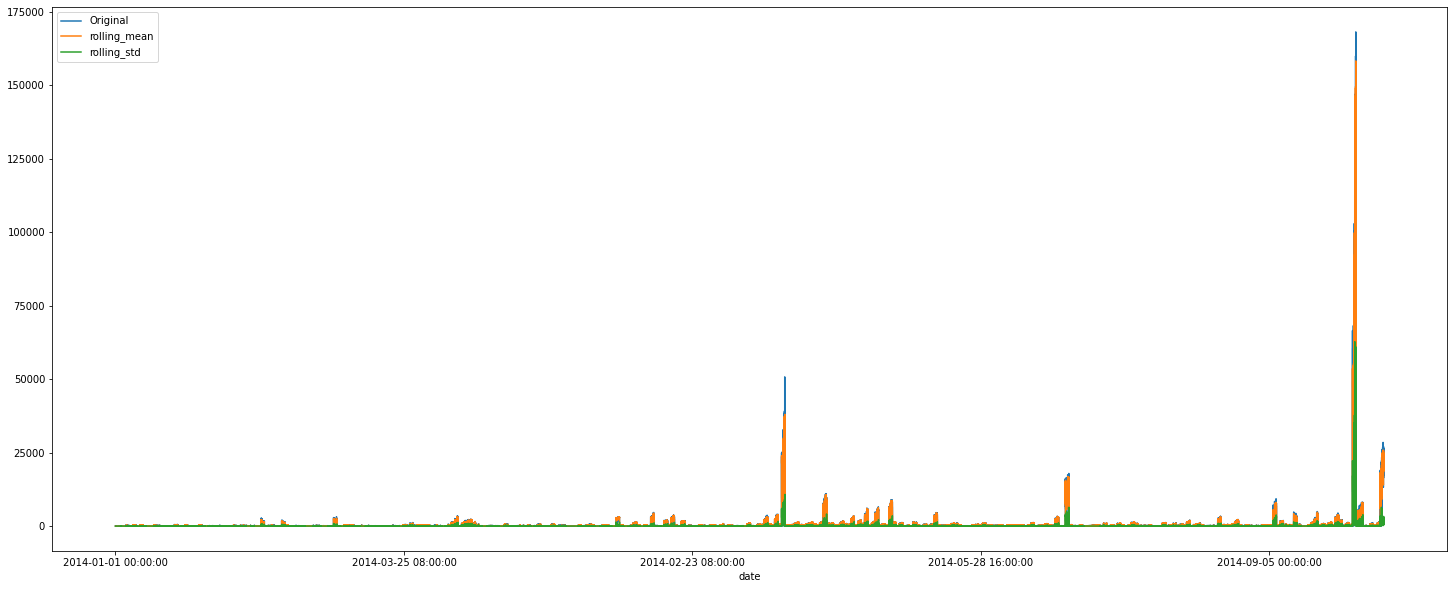

In [23]:
ts = df.set_index('date')['power_usage']
plt.figure(figsize=(25,10))
ts.plot(label='Original', legend=True)
ts.rolling(6).mean().plot(legend=True, label='rolling_mean')
ts.rolling(6).std().plot(legend=True, label='rolling_std')

# XGBOOST

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBRegressor
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [7]:
Y = df.power_usage
droplist = ['categorical_id', 'hours_from_start', 'categorical_day_of_week', 'categorical_hour', 'Unnamed: 0', 'date', 'id', 'power_usage']
X = df.drop(columns = droplist, axis = 1)
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 10, shuffle = True)

In [26]:
x_train.shape

(1758457, 6)

In [27]:
y_train.shape

(1758457,)

In [28]:
x_train.head

<bound method NDFrame.head of                t  days_from_start  hour  day  day_of_week  month
2176514  28746.0             1197    18   12            5      4
116468   28772.0             1198    20   13            6      4
1125809  27657.0             1152     9   26            2      2
394747   31051.0             1293    19   17            3      7
1286696  26544.0             1106     0   11            5      1
...          ...              ...   ...  ...          ...    ...
804336   29104.0             1212    16   27            6      4
1348317  28165.0             1173    13   19            2      3
1976281  32129.0             1338    17   31            6      8
1929743  27591.0             1149    15   23            6      2
1048548  28132.0             1172     4   18            1      3

[1758457 rows x 6 columns]>

In [8]:
model = XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [30]:
scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error',  n_jobs=-1)

In [31]:
scores = abs(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 808.488 (3.799)


In [9]:
y_pred = model.predict(x_test)

In [33]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

3566.9278394724683


In [34]:
from xgboost import plot_tree
from matplotlib.pylab import rcParams

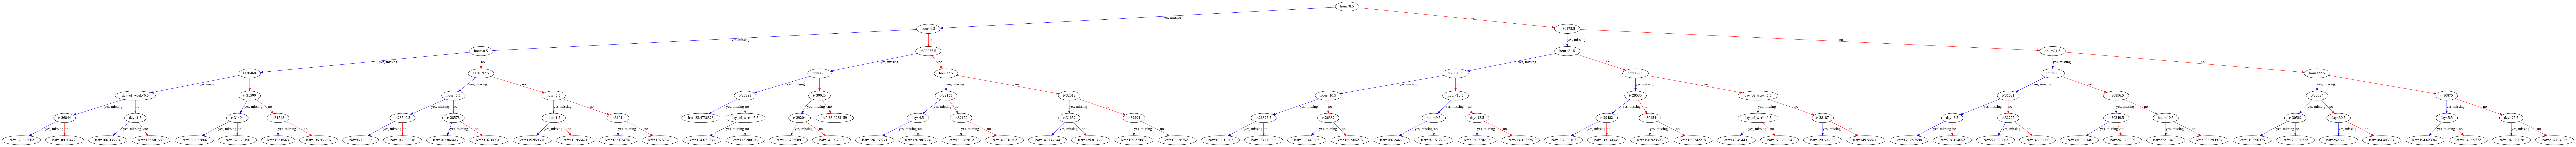

In [35]:
rcParams['figure.figsize'] = 300, 400
plot_tree(model)
plt.show()

In [36]:
feature_importance = pd.DataFrame()
feature_importance['variable'] = x_train.columns
feature_importance['importance'] = model.feature_importances_

In [37]:
feature_importance

variable  importance
0                t    0.065056
1  days_from_start    0.000000
2             hour    0.887523
3              day    0.027321
4      day_of_week    0.020100
5            month    0.000000

In [38]:
 !pip install eli5 pdpbox category_encoders

     |████████████████████████████████| 106 kB 4.2 MB/s 
     |████████████████████████████████| 34.0 MB 64 kB/s 
     |████████████████████████████████| 82 kB 495 kB/s 
     |████████████████████████████████| 13.1 MB 57.9 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758225 sha256=66693ee4db236142e4f0bba333c36f472fb12aab4d3eecad373a4bb72f8f8cde
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [39]:
from pdpbox import info_plots

pima_data = df
pima_features = df.columns[1:7]
pima_target = df.columns[0]

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


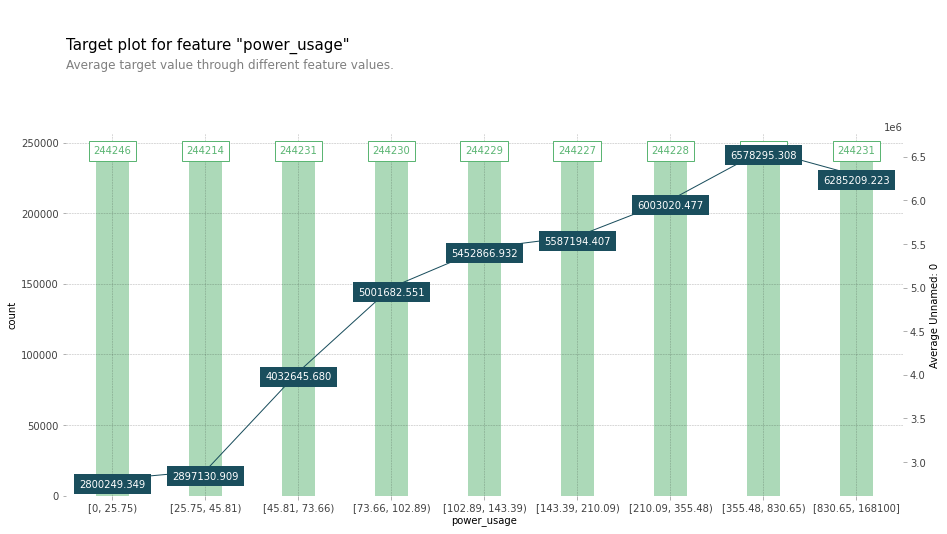

In [40]:
fig, axes, summary_df = info_plots.target_plot(
    df = pima_data,
    feature = 'power_usage',
    feature_name = 'power_usage',
    target = pima_target
)

# hypertuning xgboost using searchcv

In [41]:
"""
https://medium.com/analytics-vidhya/hyper-parameter-tuning-gridsearchcv-vs-randomizedsearchcv-499862e3ca5
    gridsearchcv vs randomizedsearchcv
    gridsearchcv는 작은 데이터셋에서 좋다.
    파라미터의 탐색공간이 커지면 randomizedsearchcv가 더 outperform
    --> randomizedsearchcv로 결정
"""

'\nhttps://medium.com/analytics-vidhya/hyper-parameter-tuning-gridsearchcv-vs-randomizedsearchcv-499862e3ca5\n    gridsearchcv vs randomizedsearchcv\n    gridsearchcv는 작은 데이터셋에서 좋다.\n    파라미터의 탐색공간이 커지면 randomizedsearchcv가 더 outperform\n    --> randomizedsearchcv로 결정\n'

In [42]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score

In [43]:
# https://xgboost.readthedocs.io/en/latest/parameter.html#learning-task-parameters
# A parameter grid for XGBoost
cv_params = {
        'min_child_weight': [1, 5, 10], #최소 인스턴스 수
        'gamma': [0.5, 1, 1.5, 2, 5], # 정보이득, 커지면 트리 깊이 줄어듬
        'subsample': [0.6, 0.8, 1.0], # 무작위 샘플링
        'max_depth': [3, 4, 5], # 최대 깊이, 과적합 방지 위해 필요
        'n_estimators' : [50, 100, 150]
        }
param_comb = 3  # n_iter


In [44]:
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
xgb = XGBRegressor(learning_rate = 0.01, nthread = 1 )
random_search = RandomizedSearchCV(xgb, param_distributions=cv_params, n_iter=param_comb, 
                                   scoring='neg_mean_absolute_error', n_jobs=4, verbose=3, random_state=7)

In [46]:
# 너무 느려서 parameter quality 포기하고 runtime 줄임
# n_estimator, param_comb 줄임
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed: 18.7min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.01,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          mo...
                                          tree_method=None,
                                          validate_parameters=None,
                                          verbosity=None),
   

In [47]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best score with %d parameter combinations:' % (param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([197.88561959, 401.92107239, 260.01514444]), 'std_fit_time': array([ 4.03626058,  4.89553017, 41.16079443]), 'mean_score_time': array([1.36885204, 1.97839179, 1.04563031]), 'std_score_time': array([0.16664825, 0.04494076, 0.3808146 ]), 'param_subsample': masked_array(data=[0.8, 0.8, 0.8],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[100, 150, 150],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 1, 10],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 4, 3],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[1.5, 1.5, 0.5],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'para

In [48]:
y_pred = random_search.best_estimator_.predict(x_test)

In [49]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

3569.8648408096174


In [50]:
#3566

In [51]:
feature_importance = pd.DataFrame()
feature_importance['variable'] = x_train.columns
feature_importance['importance'] = random_search.best_estimator_.feature_importances_

In [52]:
feature_importance

variable  importance
0                t    0.391875
1  days_from_start    0.000000
2             hour    0.608125
3              day    0.000000
4      day_of_week    0.000000
5            month    0.000000

# Bayesian optimization

# LIME

In [53]:
! pip install lime

     |████████████████████████████████| 275 kB 4.2 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=3a1dcee9358b083f8b02de3ac50b7fc1de5f1b8d3be4c1cd9bc0216f80ea2fff
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [18]:
import lime
import lime.lime_tabular

In [55]:
# all_feat = ['t', 'hour', 'day', 'day_of_week', 'month']
# explainer = lime.lime_tabular.LimeTabularExplainer(x_train.values, feature_selection = 'auto',
#                                                    feature_names = x_train.columns, verbose=True, mode='regression')

In [56]:
x_test

t  days_from_start  hour  day  day_of_week  month
1626824  30672.0             1278     0    2            2      7
618479   26783.0             1115    23   20            0      1
682135   28783.0             1199     7   14            0      4
104192   28496.0             1187     8    2            2      4
553300   27604.0             1150     4   24            0      2
...          ...              ...   ...  ...          ...    ...
2051350  29582.0             1232    14   17            5      5
107853   32157.0             1339    21    1            0      9
129682   29986.0             1249    10    3            1      6
1263735  27583.0             1149     7   23            6      2
370639   30943.0             1289     7   13            6      7

[439615 rows x 6 columns]

In [57]:
i = 0
observation = x_test.iloc[i, :]
prediction = y_pred[i]

In [58]:
# 'Tree' object has no attribute 'explain_instance'
# explanation = explainer.explain_instance(x_test.values[i], prediction, num_features = 6)

In [19]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
forest_model.fit(x_train, y_train)
explainer = lime.lime_tabular.LimeTabularExplainer(x_train.values, feature_selection = 'auto',
                                                   feature_names = x_train.columns, verbose=True, mode='regression')

In [60]:
exp = explainer.explain_instance(x_test.iloc[0], 
     forest_model.predict, num_features=6)
exp.show_in_notebook(show_table=True, show_all=False)

Intercept 702.8213872163554
Prediction_local [372.77093416]
Right: 448.6215136862067


# shap

In [61]:
! pip install shap

     |████████████████████████████████| 371 kB 4.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509238 sha256=5cf74ccb22f2f46def6be95b45ddb785e79069abadc7d5cbf1f0447abd2f93cb
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [10]:
import shap
shap.initjs()

# explainer = shap.TreeExplainer(random_search.best_estimator_)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [63]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], x_train.iloc[0,:])

In [64]:
# 긍정적인게 hour = 18, 부정적인게 t

In [11]:
# 이상치를 구해보자
errors = abs(y_pred - y_test)
# sorted_errors = np.argsort(abs(errors))
print(errors)

1626824    358.728380
618479     174.745273
682135     398.715234
104192     131.755900
553300     271.144282
              ...    
2051350    379.317886
107853     549.217175
129682     654.953941
1263735    118.811280
370639     409.934771
Name: power_usage, Length: 439615, dtype: float64


In [12]:
idx = np.argmax(errors)

In [13]:
shap.initjs()
shap_values = explainer.shap_values(x_test)
shap.force_plot(explainer.expected_value, shap_values[idx,:], x_test.iloc[idx,:])

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [ ]:
# 계속 에러
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x_test)

shap.plots.force is slow for many thousands of rows, try subsampling your data.


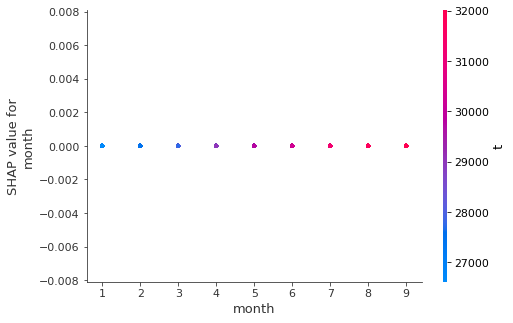

In [14]:
shap.initjs()
shap.dependence_plot("month", shap_values, x_test)

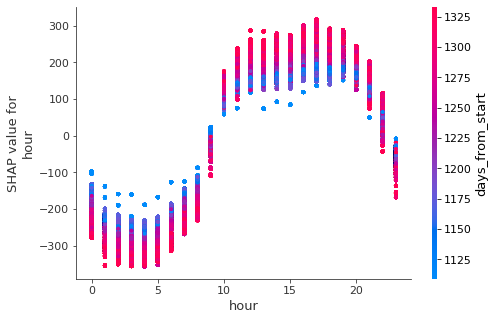

In [15]:
shap.initjs()
shap.dependence_plot("hour", shap_values, x_test)

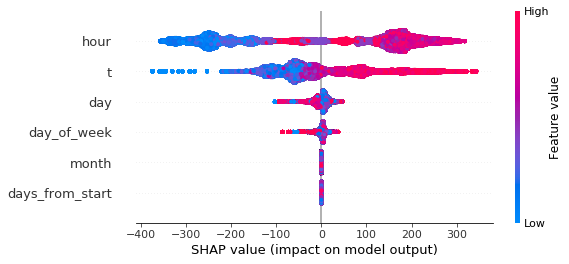

In [16]:
shap.initjs()
shap.summary_plot(shap_values, x_test)

In [ ]:
# 중요하지 않은 피처를 삭제?